In [47]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [48]:
import scipy.io
mat = scipy.io.loadmat('shuttle.mat')

In [49]:
print(type(mat))
mat.keys()

<class 'dict'>


dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [50]:
mat['__header__']

b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Apr 26 18:16:23 2016'

In [51]:
mat['__version__']

'1.0'

In [52]:
mat['__globals__']

[]

In [53]:
data = mat['X']

In [54]:
true_lable = mat['y']

In [55]:
print(true_lable.shape)

(49097, 1)


In [56]:
true_lable = true_lable.flatten('F')

In [57]:
print(true_lable.shape)

(49097,)


In [58]:
a , b = np.unique(true_lable, return_counts=True)
dict(zip(a,b))

{0: 45586, 1: 3511}

In [59]:
from sklearn.preprocessing import StandardScaler
learn_scaler=StandardScaler().fit(data)
standard_data = learn_scaler.transform(data)

In [60]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
kmeans.fit(standard_data) 
predict_labels = kmeans.labels_

In [61]:
a , b = np.unique(np.equal(predict_labels, true_lable), return_counts=True)
clusters = dict(zip(a,b))

zeross = np.zeros_like(predict_labels)
oness = np.ones_like(predict_labels)

if (True in clusters.keys()):
    if (False in clusters.keys()):
        if (clusters[False] > clusters[True]):
            predict_labels = np.where(predict_labels == 1, zeross, oness)
else:
    predict_labels = np.where(predict_labels == 1, zeross, oness)



a , b = np.unique(np.equal(predict_labels, true_lable), return_counts=True)
clusters = dict(zip(a,b))
clusters

{False: 192, True: 48905}

In [62]:
from sklearn.metrics import classification_report
print(classification_report(true_lable, predict_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45586
           1       1.00      0.95      0.97      3511

    accuracy                           1.00     49097
   macro avg       1.00      0.97      0.98     49097
weighted avg       1.00      1.00      1.00     49097



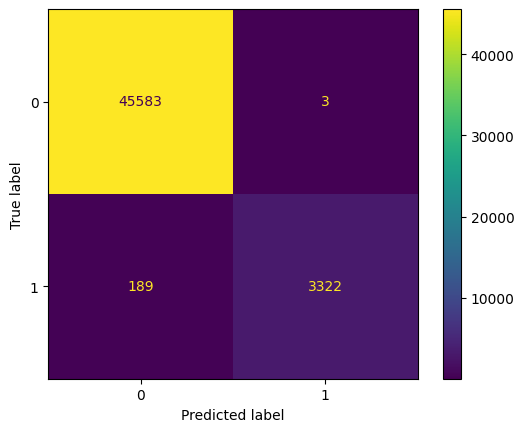

In [63]:
cm = confusion_matrix(true_lable, predict_labels, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show() 

In [64]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=2, random_state=42)
gm.fit(standard_data) 
predict_labels = gm.predict(standard_data)
predict_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [65]:
a , b = np.unique(np.equal(predict_labels, true_lable), return_counts=True)
clusters = dict(zip(a,b))

zeross = np.zeros_like(predict_labels)
oness = np.ones_like(predict_labels)

if (True in clusters.keys()):
    if (False in clusters.keys()):
        if (clusters[False] > clusters[True]):
            predict_labels = np.where(predict_labels == 1, zeross, oness)
else:
    predict_labels = np.where(predict_labels == 1, zeross, oness)



a , b = np.unique(np.equal(predict_labels, true_lable), return_counts=True)
clusters = dict(zip(a,b))
clusters

{False: 512, True: 48585}

In [66]:
print(classification_report(true_lable, predict_labels))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     45586
           1       0.87      1.00      0.93      3511

    accuracy                           0.99     49097
   macro avg       0.94      0.99      0.96     49097
weighted avg       0.99      0.99      0.99     49097



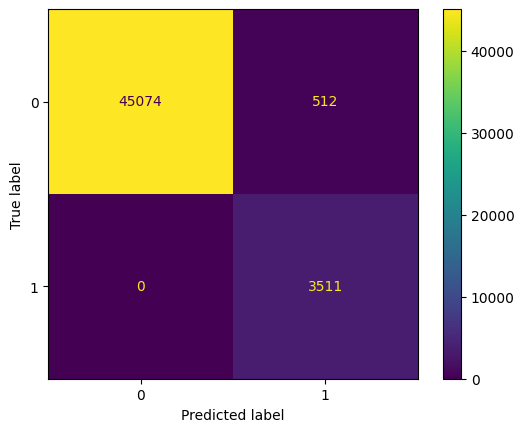

In [67]:
cm = confusion_matrix(true_lable, predict_labels, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show() 

In [68]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=0)

clustering = spectral.fit(standard_data)
predict_labels = clustering.labels_

c:\Users\Hosein\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [69]:
a , b = np.unique(np.equal(predict_labels, true_lable), return_counts=True)
clusters = dict(zip(a,b))

zeross = np.zeros_like(predict_labels)
oness = np.ones_like(predict_labels)

if (True in clusters.keys()):
    if (False in clusters.keys()):
        if (clusters[False] > clusters[True]):
            predict_labels = np.where(predict_labels == 1, zeross, oness)
else:
    predict_labels = np.where(predict_labels == 1, zeross, oness)



a , b = np.unique(np.equal(predict_labels, true_lable), return_counts=True)
clusters = dict(zip(a,b))
clusters

{False: 4454, True: 44643}

In [70]:
print(classification_report(true_lable, predict_labels))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     45586
           1       0.05      0.02      0.02      3511

    accuracy                           0.91     49097
   macro avg       0.49      0.50      0.49     49097
weighted avg       0.87      0.91      0.89     49097



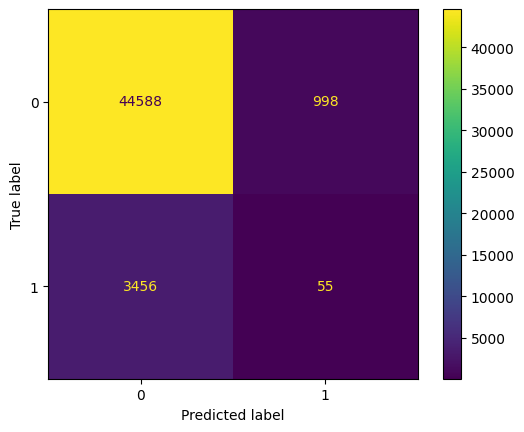

In [71]:
cm = confusion_matrix(true_lable, predict_labels, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show() 